In [188]:
import os
import shutil
import cv2
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [189]:
ORIGINAL_DATA_DIR = "Program_code\\AI\\test_project\\airbus-ship-detection"

In [190]:
df = pd.read_csv(os.path.join(ORIGINAL_DATA_DIR, "train_ship_segmentations_v2.csv"))

### Number of images

In [191]:
df_unique = df.drop_duplicates(subset="ImageId", keep="first")
print("="*40)
print(f"Total image quantity: {df_unique.shape[0]}")
print("="*40)

Total image quantity: 192556


### Ship presency check

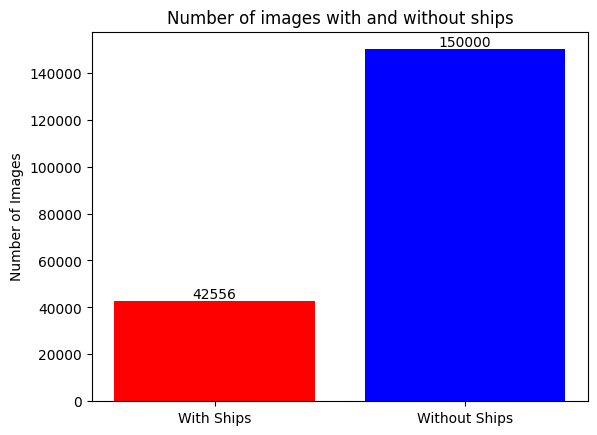

In [192]:
# Assuming 'EncodedPixels' is NaN for images without ships, and non-NaN for images with ships
num_images_with_ships = df_unique['EncodedPixels'].notna().sum()
num_images_without_ships = df_unique['EncodedPixels'].isna().sum()

# Data to plot
labels = ['With Ships', 'Without Ships']
sizes = [num_images_with_ships, num_images_without_ships]
colors = ['red', 'blue']

# Plot
fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Images')
ax.set_title('Number of images with and without ships')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

# Attach a text label above each bar, displaying its height
for i in range(len(sizes)):
    ax.text(i, sizes[i], str(sizes[i]), ha='center', va='bottom')

plt.show()

### Exploration of images with ships

#### Ship quantities

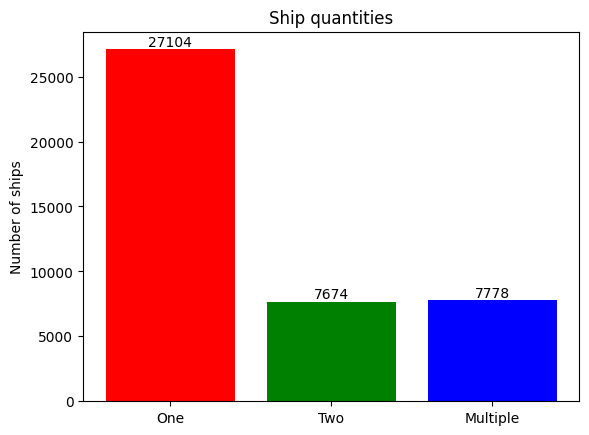

In [193]:
df_ships = df.loc[df["EncodedPixels"].notna()]
quantities = df_ships.groupby("ImageId").apply(lambda g: len(g))
single_ship_num = (quantities == 1).sum()
two_ships_num = (quantities == 2).sum()
multiple_ships_num = (quantities > 2).sum()

# Data to plot
labels = ["One", "Two", "Multiple"]
sizes = [single_ship_num, two_ships_num, multiple_ships_num]
colors = ['red', 'green', "blue"]

# Plot
fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of ships')
ax.set_title('Ship quantities')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

# Attach a text label above each bar, displaying its height
for i in range(len(sizes)):
    ax.text(i, sizes[i], str(sizes[i]), ha='center', va='bottom')

plt.show()

#### Ship location types

In [202]:
def read_image(path:str) -> np.array:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def subplot(images:list, title:str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(10, 7))
    for ax, img in zip(axes, images): ax.imshow(img); ax.axis("off")
    fig.suptitle(title, fontsize=12)
    plt.subplots_adjust(top=1.4, bottom=0.1, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

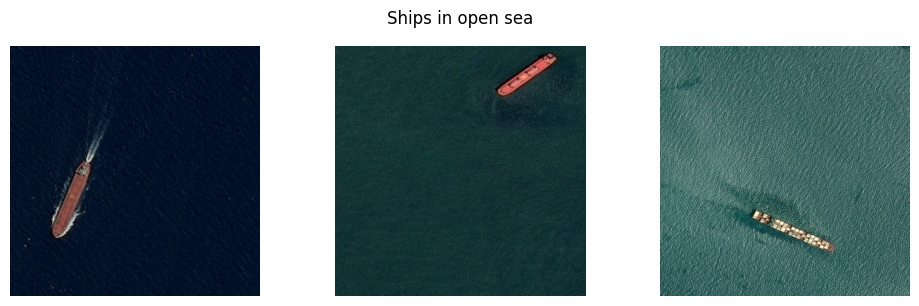

In [195]:
open_sea_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00fd8e126.jpg"))
open_sea_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00a52cd2a.jpg"))
open_sea_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00ce2c1c0.jpg"))
subplot([open_sea_img1, open_sea_img2, open_sea_img3], "Ships in open sea")

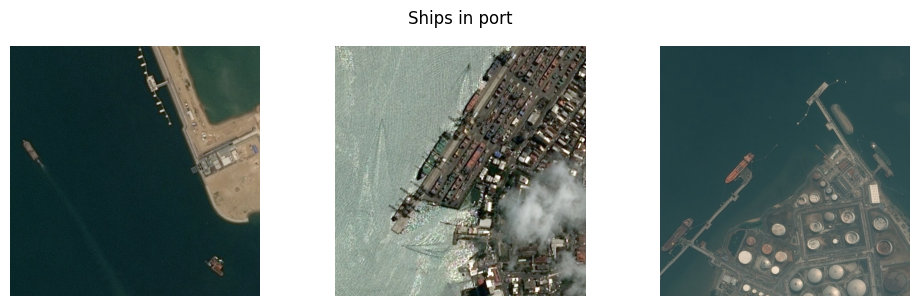

In [196]:
port_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00a9be085.jpg"))
port_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00c996565.jpg"))
port_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a286fb15.jpg"))
subplot([port_img1, port_img2, port_img3], "Ships in port")

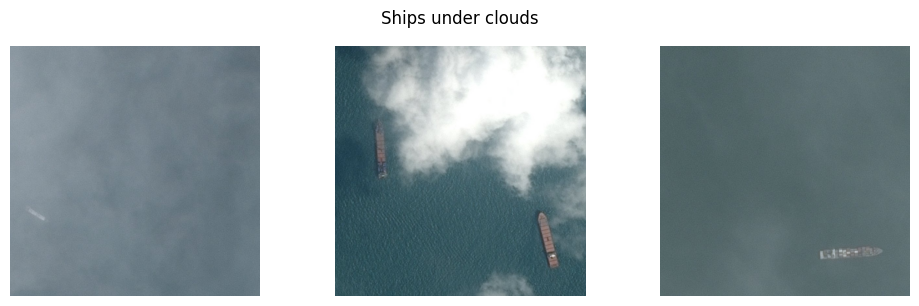

In [197]:
clouds_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00b101ed7.jpg"))
clouds_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a1174f25.jpg"))
clouds_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0bb7aaeaf.jpg"))
subplot([clouds_img1, clouds_img2, clouds_img3], "Ships under clouds")

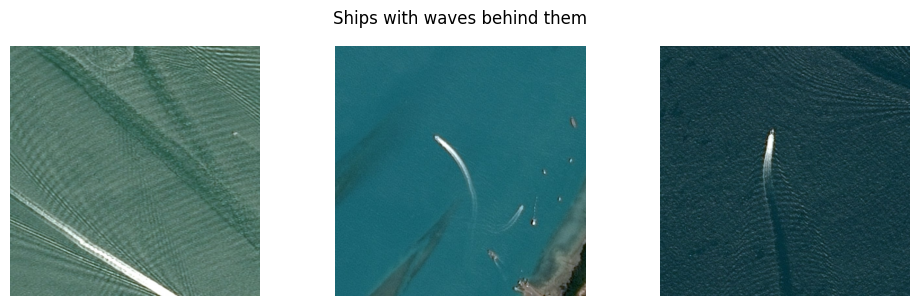

In [198]:
waves_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00c3bafa8.jpg"))
waves_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a2e15e29.jpg"))
waves_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a5ae8465.jpg"))
subplot([waves_img1, waves_img2, waves_img3], "Ships with waves behind them")

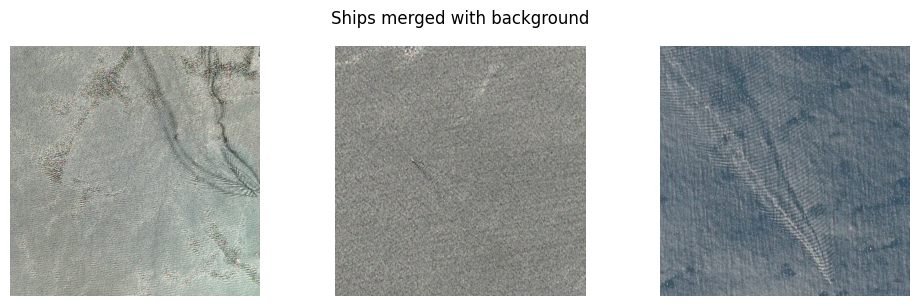

In [199]:
background_merging_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a253b8bb.jpg"))
background_merging_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0c0b93075.jpg"))
background_merging_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0aa9272e6.jpg"))
subplot([background_merging_img1, background_merging_img2, background_merging_img3], "Ships merged with background")

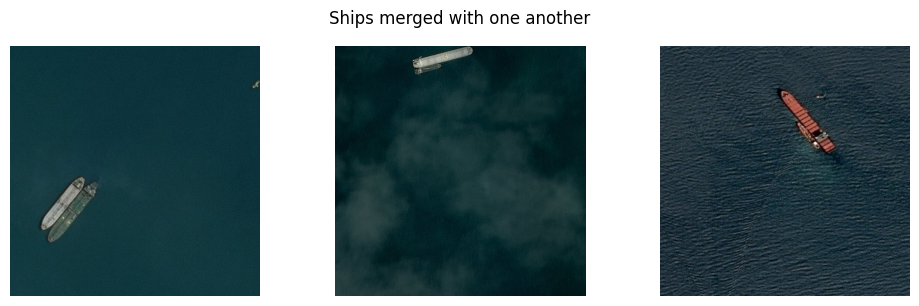

In [200]:
merged_ships1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\ffe89d4cb.jpg"))
merged_ships2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00552a73d.jpg"))
merged_ships3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\014624873.jpg"))
subplot([merged_ships1, merged_ships2, merged_ships3], "Ships merged with one another")

### Exploration of images without ships

#### Types of images without ships

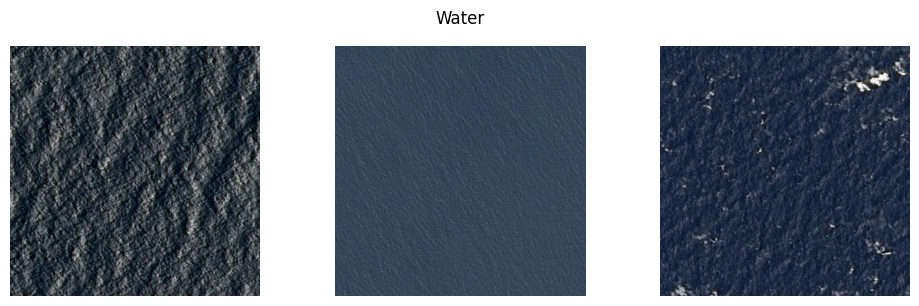

In [204]:
water_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00a6d0513.jpg"))
water_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00a74a7fe.jpg"))
water_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00acaac4f.jpg"))
subplot([water_img1, water_img2, water_img3], "Water")

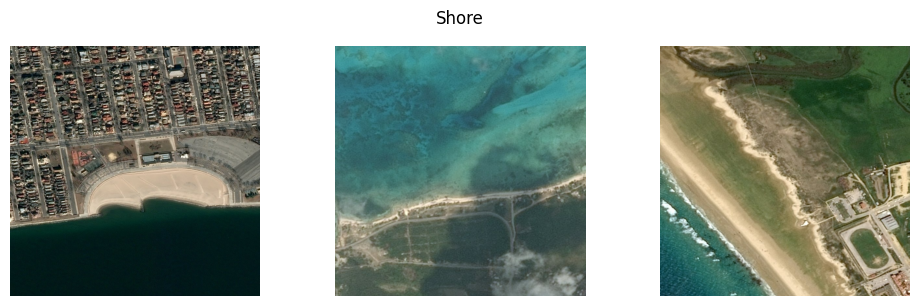

In [205]:
shore_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\000c34352.jpg"))
shore_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a18f6d48.jpg"))
shore_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a7d1c8c0.jpg"))
subplot([shore_img1, shore_img2, shore_img3], "Shore")

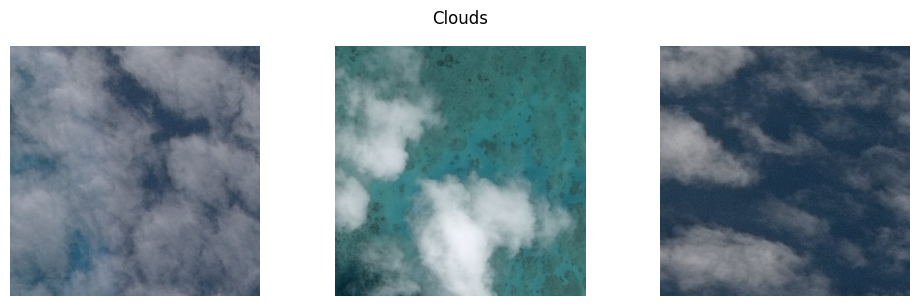

In [206]:
clouds_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00af75a14.jpg"))
clouds_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a44d3ebb.jpg"))
clouds_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a48c2e6d.jpg"))
subplot([clouds_img1, clouds_img2, clouds_img3], "Clouds")

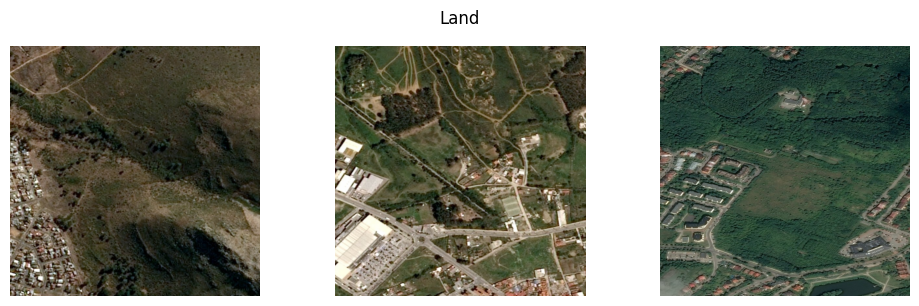

In [207]:
land_img1 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\0a2f5350f.jpg"))
land_img2 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00e3a7230.jpg"))
land_img3 = read_image(os.path.join(ORIGINAL_DATA_DIR, "train_v2\\00e7b68d6.jpg"))
subplot([land_img1, land_img2, land_img3], "Land")